## 0. Cargar Librerías

In [32]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error , r2_score

from scipy import stats

import statsmodels.formula.api as smf

## 1. Carga de Datos

In [2]:
Refrescos = pd.read_csv('./refrescos.csv',index_col=0)

Refrescos

,y,x1,x2
Observacion,,,
1,16.68,7,560
2,11.50,3,220
3,12.03,3,340
4,14.88,4,80
5,13.75,6,150
6,18.11,7,330
7,8.00,2,110
8,17.83,7,210
9,79.24,30,1460


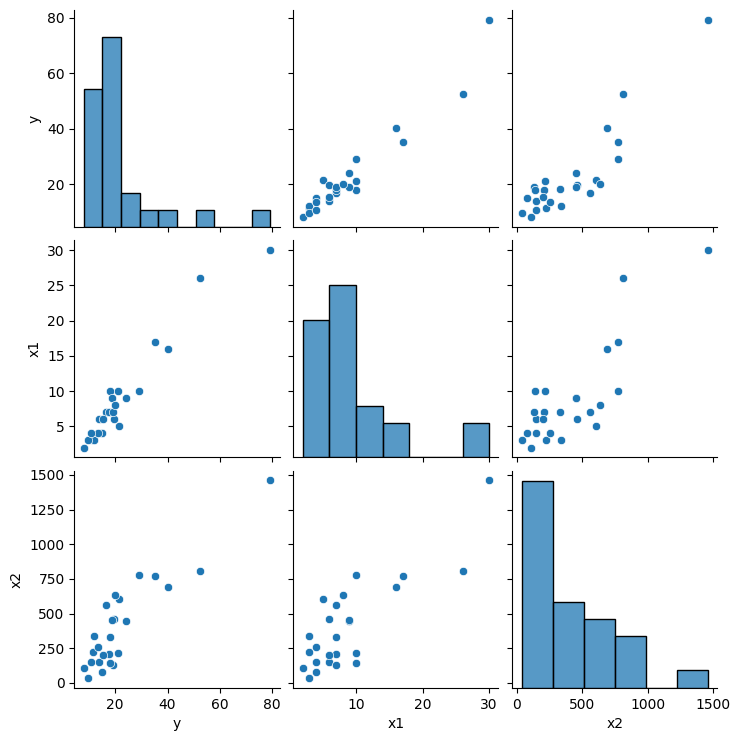

In [3]:
sns.pairplot(Refrescos)

## 2. Modelo de Regresión Lineal Manual

In [4]:
size_n = Refrescos.shape[0]
DataX = Refrescos[['x1','x2']].to_numpy()

MatrizX = np.concat([np.ones((size_n,1)),DataX],axis=1)

In [5]:
ValuesY = Refrescos[['y']].to_numpy()

In [6]:
EstimatorBeta = np.linalg.inv(MatrizX.T@MatrizX) @ MatrizX.T @ ValuesY

EstimatorBeta

array([[2.34123115],
       [1.61590721],
       [0.01438483]])

In [7]:
EstimatorY_Manual = MatrizX@EstimatorBeta

## 3. Modelo de Regresión Lineal Modelo

In [8]:
Model = LinearRegression()
Model.fit(MatrizX,ValuesY)

EstimatorY_Model = Model.predict(MatrizX)

## 4. Estimación de $\sigma^2$

In [9]:
SSE = (ValuesY.T@ValuesY - 2*EstimatorY_Manual.T@ValuesY + EstimatorY_Manual.T@EstimatorY_Manual)[0,0]

SSE

np.float64(233.73167742054284)

In [10]:
EstimatorSquareSigma = SSE / (size_n - EstimatorBeta.shape[0])

EstimatorSquareSigma

np.float64(10.62416715547922)

## 5. Prueba de Hipótesis

### 5.1. Coeficientes de Regresión

Primero se obtiene la sumas de cuadrados provenientes de cada fuente de variación y se calcula el valor del estadístico de prueba ($F_0$)

In [11]:
SCT = (ValuesY.T@ValuesY - np.sum(ValuesY)**2/size_n)[0,0]
SCT , np.sum((ValuesY - np.mean(ValuesY))**2)

(np.float64(5784.542599999992), np.float64(5784.5426))

In [18]:
SCE = (EstimatorBeta.T@MatrizX.T@ValuesY - np.sum(ValuesY)**2/size_n)[0,0]
SCE , np.sum((EstimatorY_Model - np.mean(ValuesY))**2)

(np.float64(5550.810922579409), np.float64(5550.810922579427))

In [13]:
SSE = (SCT - SCE)
SSE , np.sum((ValuesY - EstimatorY_Model)**2)

(np.float64(233.73167742058286), np.float64(233.73167742055273))

In [14]:
gl_sce = (len(EstimatorBeta)-1)
gl_sse = (size_n-len(EstimatorBeta))

F_0 = (SCE/gl_sce) / (SSE/gl_sse)
F_0

np.float64(261.2351086605282)

In [15]:
significance_level = 0.05
F_1 = stats.f.ppf(1-significance_level,gl_sce,gl_sse)

In [16]:
F_0 , F_1 

(np.float64(261.2351086605282), np.float64(3.44335677936672))

Como $F_0$ es mayor que $F_1$ implica que se rechaza la hipótesis nula, es decir, existen variables de regresión que tiene una influencia (correlación) sobre la variabl de respuesta.

### 5.2. Coeficientes Individuales de Regresión

In [23]:
c22 = np.linalg.inv(MatrizX.T@MatrizX)[2,2]
c22

np.float64(1.2287447424397283e-06)

In [26]:
t_0 = (EstimatorBeta[2] / np.sqrt(EstimatorSquareSigma*c22))[0]
t_0

np.float64(3.9813131367431627)

In [30]:
t_1 = stats.t.ppf(1 - significance_level/2 , size_n - len(EstimatorBeta))
t_1

np.float64(2.0738730679040147)

In [33]:
LinearModel = smf.ols("y ~ x1 + x2",Refrescos).fit()

In [35]:
LinearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     261.2
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           4.69e-16
Time:                        08:23:00   Log-Likelihood:                -63.415
No. Observations:                  25   AIC:                             132.8
Df Residuals:                      22   BIC:                             136.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3412      1.097      2.135      0.044       0.067       4.616
x1             1.6159      0.171      9.464      0.000       1.262       1.970
x2             0.0144      0.004      3.981      0.001       0.007       0.022
==============================================================================
Omnibus:                        0.421   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.010
Skew:                           0.032   Prob(JB):                        0.995
Kurtosis:                       3.073   Cond. No.                         873.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como $t_0$ es mayor que $t_1$ implica que se rechaza la hipótesis nula, es decir, la variable `x2` tiene una influencia sobre el modelo

## 6. Intervalos de Confianza

### 6.1. Coeficientes de Regresión

In [38]:
c11 = np.linalg.inv(MatrizX.T@MatrizX)[1,1]
c11

np.float64(0.002743783290854475)

In [47]:
Value_t = stats.t.ppf(1 - significance_level/2,size_n-len(EstimatorBeta))

Left = (EstimatorBeta[1] - Value_t * np.sqrt(EstimatorSquareSigma*c11))[0]
Right = (EstimatorBeta[1] + Value_t * np.sqrt(EstimatorSquareSigma*c11))[0]

Left , EstimatorBeta[1][0] , Right

(np.float64(1.2618246618353162),
 np.float64(1.6159072106092514),
 np.float64(1.9699897593831865))

### 6.2. Respuesta Media

In [61]:
X_0 = np.array([[1,8,275]]).T

y_0 = X_0.T@EstimatorBeta

In [63]:
var_y_0 = (EstimatorSquareSigma*X_0.T@np.linalg.inv(MatrizX.T@MatrizX)@X_0)[0,0]
var_y_0

np.float64(0.5734134120661323)

In [64]:
LeftMean = y_0 - Value_t*np.sqrt(var_y_0)
RightMean = y_0 + Value_t*np.sqrt(var_y_0)

LeftMean , y_0 , RightMean

(array([[17.65389505]]), array([[19.22431605]]), array([[20.79473705]]))